In [41]:
#input: img (BGR)
#output: img (BGR)
%matplotlib inline
def enhance_text(img):
    import numpy as np 
    import cv2
    import skimage.filters as filters
    import matplotlib.pyplot as plt
    # load image
    image = img
    plt.imshow(img)
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    plt.imshow(thresh)
    plt.show()
    #gamma and equalizeHist
    #thresh = adjust_gamma(thresh,gamma=1.5)
    #thresh = cv2.equalizeHist(thresh)
    #erode
    kernel = np.ones((2,2),np.uint8)
    opening = cv2.erode(thresh,kernel,iterations = 1)
    plt.imshow(opening)
    plt.show()
    # Find contours and remove small noise
    cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 30:
            cv2.drawContours(opening, [c], -1, 0, -1)
    plt.imshow(opening)
    plt.show()
    # Invert and apply slight Gaussian blur and sharpen
    result = 255 - opening
    result = cv2.GaussianBlur(result, (3,3), 0)
    sharpen_filter = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])
    result = cv2.filter2D(result, -1, sharpen_filter)
    plt.imshow(result)
    plt.show()
    result = cv2.cvtColor(result,cv2.COLOR_GRAY2BGR)
    plt.imshow(result)
    plt.show()
    return result

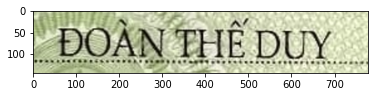

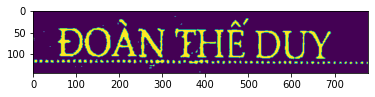

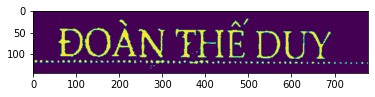

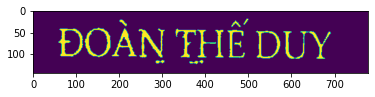

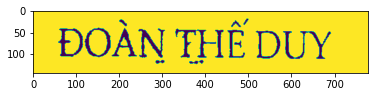

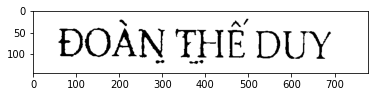

In [42]:
import cv2
img = cv2.imread('/data_science/data_science/data/v1/idcard/bug/id_img_test.jpg')
a=enhance_text(img)